# Statistics Challenge (Optional)

Use the `orders.csv` dataset in the same directory to complete this challenge.

**Background**:

There are exactly 100 sneaker shops on a sneaker retailing website, and each of these shops sells only one model of shoe. We want to do some analysis of the average order value (AOV). When we look at orders data over a 30 day window, we naively calculate an AOV of $3145.13. Given that we know these shops are selling sneakers, a relatively affordable item, something seems wrong with our analysis. 

**Questions**:

- What went wrong with this metric (AOV) and the current analysis in general. Support your answers with appropriate visualizations.

- Propose a new metric that better represents the behavior of the stores' customers. Why are these metrics better and what are their values?

- Using the `created_at` column as a proxy for the date and time of order creation, provide a brief analysis of the trends in the customers' purchasing behavior.

Show all of your work in this notebook.

# Setup

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("orders.csv")
df

,order_id,shop_id,user_id,order_value,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56
1,2,92,925,90,1,cash,2017-03-03 17:38:52
2,3,44,861,144,1,cash,2017-03-14 4:23:56
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37
4,5,18,883,156,1,credit_card,2017-03-01 4:35:11
...,...,...,...,...,...,...,...
4995,4996,73,993,330,2,debit,2017-03-30 13:47:17
4996,4997,48,789,234,2,cash,2017-03-16 20:36:16
4997,4998,56,867,351,3,cash,2017-03-19 5:42:42
4998,4999,60,825,354,2,credit_card,2017-03-16 14:51:18


In [4]:
print(df["order_value"].mean())

3145.128


# Identifying Problems with AOV

<Axes: xlabel='order_id', ylabel='order_value'>

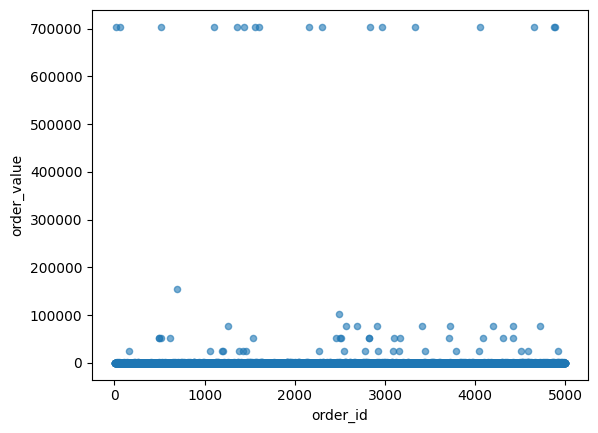

In [8]:
df.plot.scatter(x = "order_id", y = "order_value", alpha = 0.6)

In [6]:
print(df[df["order_value"] > 100000])

      order_id  shop_id  user_id  order_value  total_items payment_method  \
15          16       42      607       704000         2000    credit_card   
60          61       42      607       704000         2000    credit_card   
520        521       42      607       704000         2000    credit_card   
691        692       78      878       154350            6          debit   
1104      1105       42      607       704000         2000    credit_card   
1362      1363       42      607       704000         2000    credit_card   
1436      1437       42      607       704000         2000    credit_card   
1562      1563       42      607       704000         2000    credit_card   
1602      1603       42      607       704000         2000    credit_card   
2153      2154       42      607       704000         2000    credit_card   
2297      2298       42      607       704000         2000    credit_card   
2492      2493       78      834       102900            4          debit   

In [9]:
df2 = df[df["order_value"] > 500000]
df3 = df[df["order_value"] < 500000]

<Axes: xlabel='order_id', ylabel='order_value'>

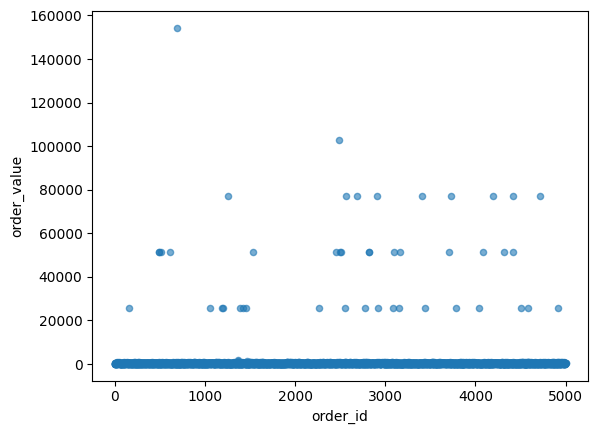

In [11]:
df3.plot.scatter(x = "order_id", y = "order_value", alpha = 0.6)

In [26]:
df3["order_value"].mean()

754.0919125025085

<Axes: xlabel='order_id', ylabel='order_value'>

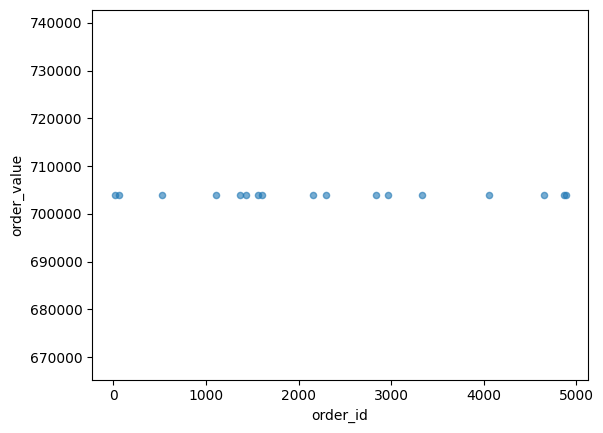

In [10]:
df2.plot.scatter(x = "order_id", y = "order_value", alpha = 0.6)

In [25]:
df2

,order_id,shop_id,user_id,order_value,total_items,payment_method,created_at
15,16,42,607,704000,2000,credit_card,2017-03-07 4:00:00
60,61,42,607,704000,2000,credit_card,2017-03-04 4:00:00
520,521,42,607,704000,2000,credit_card,2017-03-02 4:00:00
1104,1105,42,607,704000,2000,credit_card,2017-03-24 4:00:00
1362,1363,42,607,704000,2000,credit_card,2017-03-15 4:00:00
1436,1437,42,607,704000,2000,credit_card,2017-03-11 4:00:00
1562,1563,42,607,704000,2000,credit_card,2017-03-19 4:00:00
1602,1603,42,607,704000,2000,credit_card,2017-03-17 4:00:00
2153,2154,42,607,704000,2000,credit_card,2017-03-12 4:00:00
2297,2298,42,607,704000,2000,credit_card,2017-03-07 4:00:00


In [24]:
df2["user_id"].size

17

The problem with the AOV metric was a series of outliers from the same customer, with userid 607. The user made 17 orders of 2000 items each, each worth \\$704000. These orders drastically raised the AOV, since it's a mean and is heavily affected by outliers. Without 607's orders, the AOV is reduced to a more reasonable \\$754.09. AOV is flawed because in the presence of such drastic outliers, it does not produce an accurate metric. In this case, it was drastically increased because of one user's orders, when the rest of the orders remained from \\$0-\\$160000.

# Alternative Metrics

We have multiple options for AOV alternatives. One is to measure the same way but utilize the meidan instead of the mean to prevent the outliers from having as much of an affect. The other is to still take the average order value, but divide it by the number of items in the order to make sure that the order values are proportional to the sizes, possibly preventing outliers in the first place.

In [29]:
# Median Order Value
df["order_value"].median()

284.0

In [34]:
df[df["order_value"] < 1000].shape

(4929, 8)

Because the vast majority of the data observations are very small (4929 out of 5000 having order values of less than \\$1000), the median is much more accurate but potentially doesn't account as much as wanted for the larger orders. 

In [30]:
# Average Value Per Item
df["order_value_per_item"] = df["order_value"] / df["total_items"]
df["order_value_per_item"].mean()

387.7428

The average order value per item is still a reasonable number, while better taking account for larger order sizes.

# Time Series Analysis

### All Orders

Text(0.5, 1.0, 'Order Value over Time')

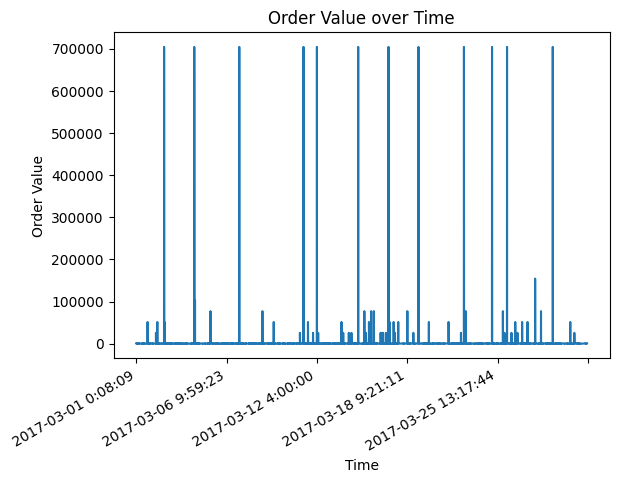

In [42]:
ax = df.groupby("created_at")["order_value"].mean().plot()
ax.figure.autofmt_xdate()
plt.ylabel("Order Value")
plt.xlabel("Time")
plt.title("Order Value over Time")

Text(0.5, 1.0, 'Order Size over Time')

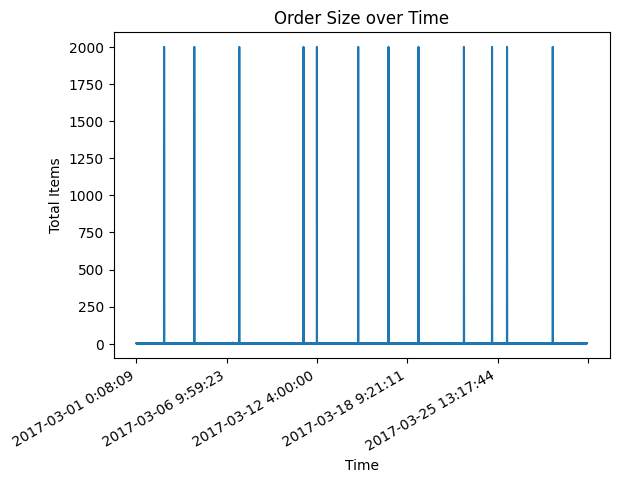

In [43]:
ax = df.groupby("created_at")["total_items"].mean().plot()
ax.figure.autofmt_xdate()
plt.ylabel("Total Items")
plt.xlabel("Time")
plt.title("Order Size over Time")

Text(0.5, 1.0, 'Order Value Per Item over Time')

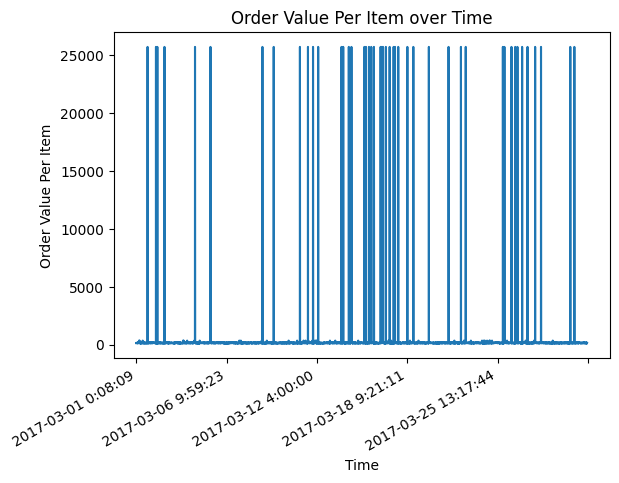

In [44]:
ax = df.groupby("created_at")["order_value_per_item"].mean().plot()
ax.figure.autofmt_xdate()
plt.ylabel("Order Value Per Item")
plt.xlabel("Time")
plt.title("Order Value Per Item over Time")

It's hard to tell much from these, as the data primarily consists of very small orders, leading us to graphs where there is a steady line that appears around 0 (due to the scale of the graph) and period spikes where larger orders occur. In order to get a better picture, we can divide the data into smaller and larger orders and redo the graphs 

In [58]:
df2 = df[df["order_value"] <= 20000]
df3 = df[df["order_value"] > 20000]

### Small Orders (<\\$20000)

Text(0.5, 1.0, 'Order Value over Time')

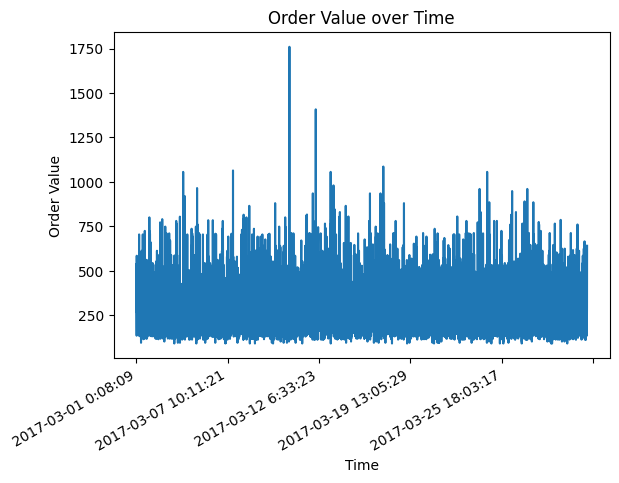

In [59]:
ax = df2.groupby("created_at")["order_value"].mean().plot()
ax.figure.autofmt_xdate()
plt.ylabel("Order Value")
plt.xlabel("Time")
plt.title("Order Value over Time")

Text(0.5, 1.0, 'Order Size over Time')

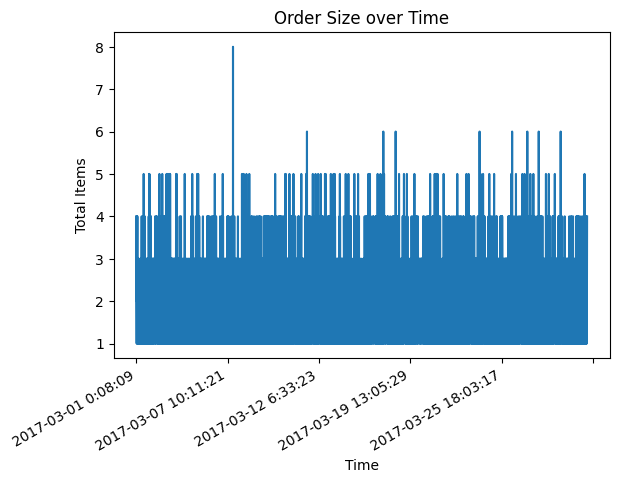

In [60]:
ax = df2.groupby("created_at")["total_items"].mean().plot()
ax.figure.autofmt_xdate()
plt.ylabel("Total Items")
plt.xlabel("Time")
plt.title("Order Size over Time")

Text(0.5, 1.0, 'Order Value Per Item over Time')

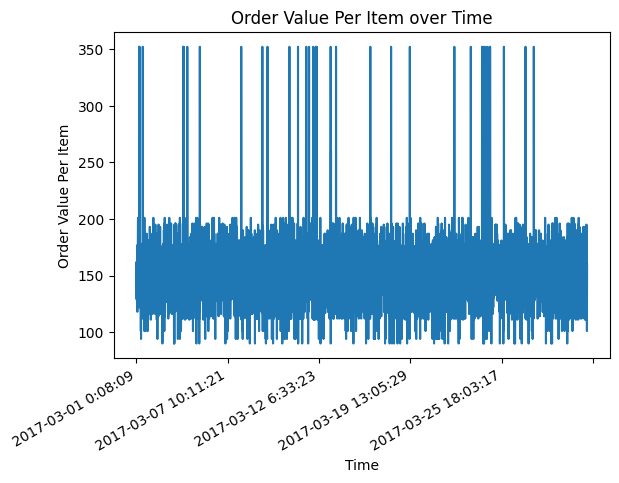

In [61]:
ax = df2.groupby("created_at")["order_value_per_item"].mean().plot()
ax.figure.autofmt_xdate()
plt.ylabel("Order Value Per Item")
plt.xlabel("Time")
plt.title("Order Value Per Item over Time")

There is no discernable patterns in any of the graphs. Every graph shows a constant amount of noise within a certain range and periodic upward spikes from the main portion. There seems to be a fairly consistent range of items (1-8), but that is more likely due to the limited selection of orders to smaller order values.

### Large Orders (>$20000)

Text(0.5, 1.0, 'Order Value over Time')

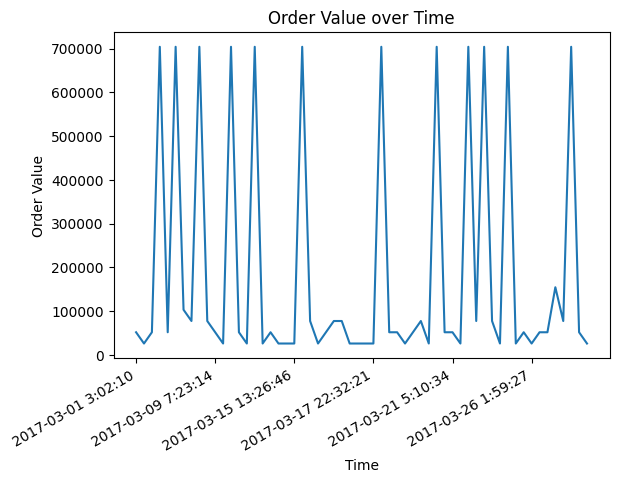

In [62]:
ax = df3.groupby("created_at")["order_value"].mean().plot()
ax.figure.autofmt_xdate()
plt.ylabel("Order Value")
plt.xlabel("Time")
plt.title("Order Value over Time")

Text(0.5, 1.0, 'Order Size over Time')

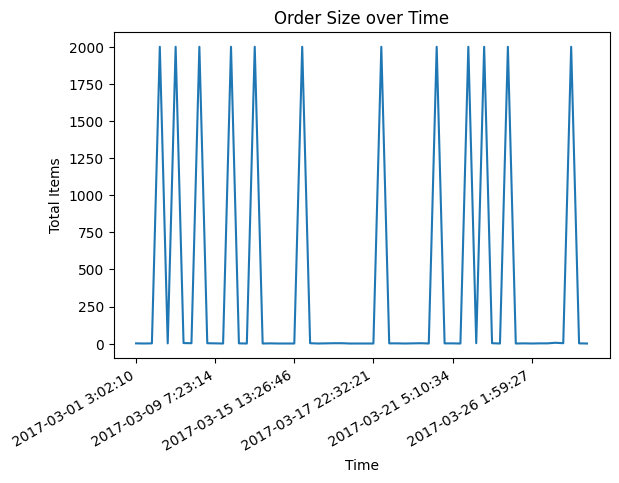

In [63]:
ax = df3.groupby("created_at")["total_items"].mean().plot()
ax.figure.autofmt_xdate()
plt.ylabel("Total Items")
plt.xlabel("Time")
plt.title("Order Size over Time")

Text(0.5, 1.0, 'Order Value Per Item over Time')

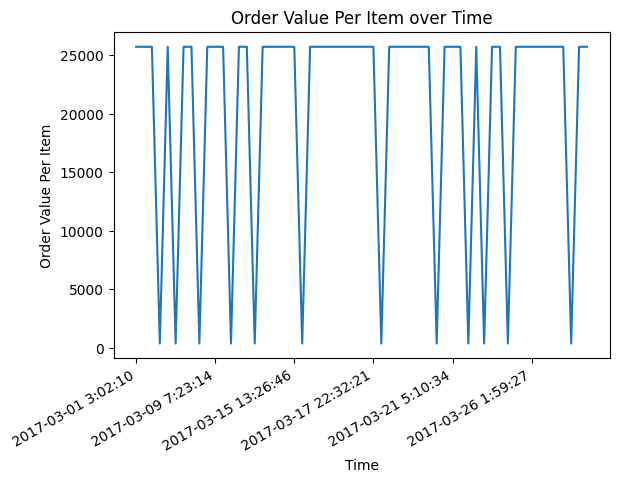

In [64]:
ax = df3.groupby("created_at")["order_value_per_item"].mean().plot()
ax.figure.autofmt_xdate()
plt.ylabel("Order Value Per Item")
plt.xlabel("Time")
plt.title("Order Value Per Item over Time")

The first two graphs are very telling of the behavior of user 607, with consistent maximum peaks whenever they place an order (each of \\$704000, 2000 items, \\$352 per item). Interestingly, this trend does not occur in the order value per item graph, with the graph consistently maintaining a value of over \\$25000 per ite, and ocassionally dipping down closer to 0.

In order to obtain a full view, we should also redo the graphs on the subset of data consisting of large orders, but not including user 607.

In [66]:
df4 = df[(df["order_value"] > 20000) & (df["order_value"] < 704000)]

### Larger Orders Without User 607 (>\\$20000, <\\$704000)

Text(0.5, 1.0, 'Order Value over Time')

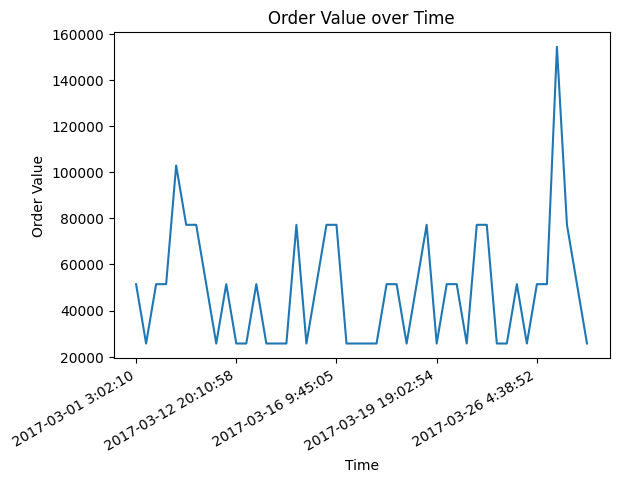

In [67]:
ax = df4.groupby("created_at")["order_value"].mean().plot()
ax.figure.autofmt_xdate()
plt.ylabel("Order Value")
plt.xlabel("Time")
plt.title("Order Value over Time")

Text(0.5, 1.0, 'Order Size over Time')

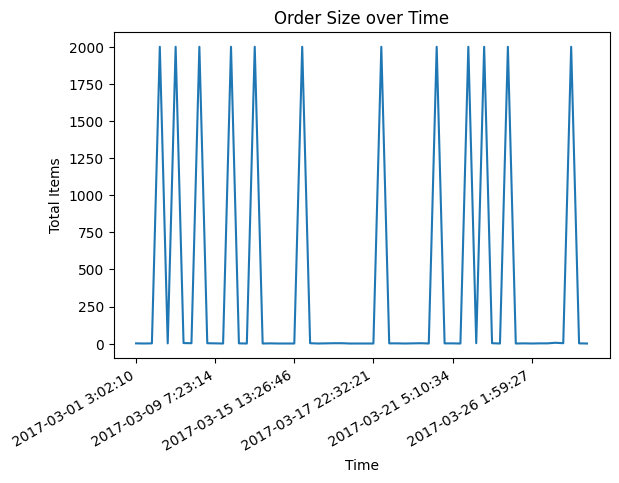

In [68]:
ax = df3.groupby("created_at")["total_items"].mean().plot()
ax.figure.autofmt_xdate()
plt.ylabel("Total Items")
plt.xlabel("Time")
plt.title("Order Size over Time")

Text(0.5, 1.0, 'Order Value Per Item over Time')

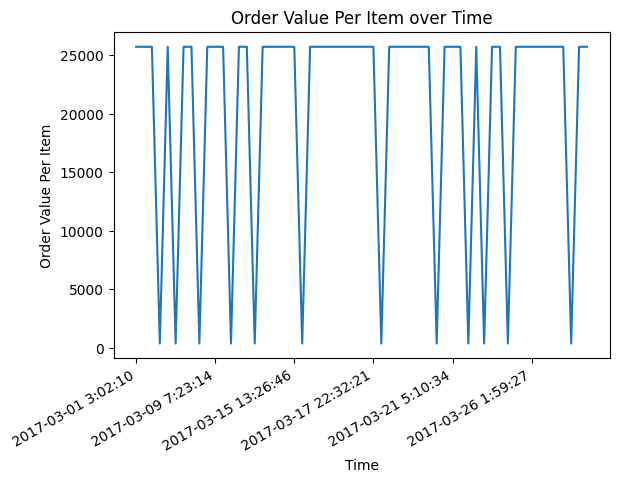

In [69]:
ax = df3.groupby("created_at")["order_value_per_item"].mean().plot()
ax.figure.autofmt_xdate()
plt.ylabel("Order Value Per Item")
plt.xlabel("Time")
plt.title("Order Value Per Item over Time")

We can see that the total items still peak at 2000, indicating that there are other users who buy equally massive orders, just not as expensive. The order values seems to mostly remain around \\$80000, but has a big peak towards the end of the time period at somewhere around \\$158000. The order value per time graph looks very similar to the previous, consistently hanging over \\$25000 per item and then dipping to closer to 0.